In [161]:
import pandas as pd 
import numpy as np
import os 
import time
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [171]:
os.listdir()
data=pd.read_csv("usdtrytrading.txt",sep="\t")
print(data.shape)
data=data.dropna()
# data=data[data.Volume>0]
print(data.shape)

(11039, 7)
(11032, 7)


In [163]:
data.head()
print(data.shape)
data.head()
data_May_6=data.iloc[-942:,:]
print(data_May_6.head())
df_orig=data['Close']
df_may6=data_May_6['Close']

(11039, 7)
             Day  Time     Open     High      Low    Close      Volume
10097  6.05.2019    17  5.98979  5.98981  5.98843  5.98843  12000000.0
10098  6.05.2019    18  5.98753  5.98867  5.98639  5.98862  44250000.0
10099  6.05.2019    19  5.98862  5.98891  5.98861  5.98890  45000000.0
10100  6.05.2019    20  5.98789  5.98792  5.98403  5.98404  48750000.0
10101  6.05.2019    21  5.98403  5.98403  5.98388  5.98388  16500000.0


In [201]:
def plot_data(data,running_average_window,tit):
    
    fig= plt.figure()
    rolling_mean = data.rolling(window=running_average_window).mean()
    rolling_mean2 = data.rolling(window=running_average_window).std()
    
    print(rolling_mean.shape)
    plt.plot(data, label=tit)
    plt.plot(rolling_mean, label=str(running_average_window)+' Sample Average of Mean', color='orange')
#     plt.plot(rolling_mean2, label=str(running_average_window)+' Minutes Average of Std', color='orange')
#     plt.plot(data, rolling_mean2, label='AMD 50 Day SMA', color='magenta')
    plt.legend(loc='upper left')
    plt.title(tit+" and "+str(running_average_window)+" Sample average")
    plt.show()
    
    fig.savefig(tit+"_"+str(running_average_window)+".png")
    fig2=plt.figure()
    plt.plot(rolling_mean2, label=str(running_average_window)+' Sample Average of Std', color='orange')
    plt.title("Std of "+tit)
    plt.show()
    

(11039,)


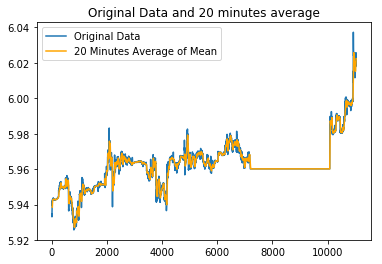

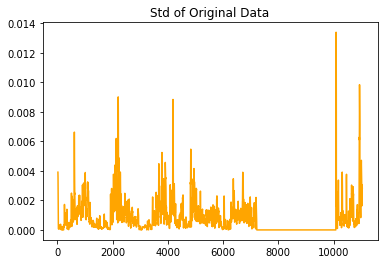

(11039,)


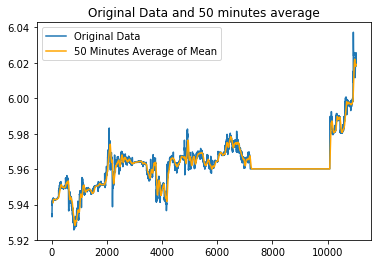

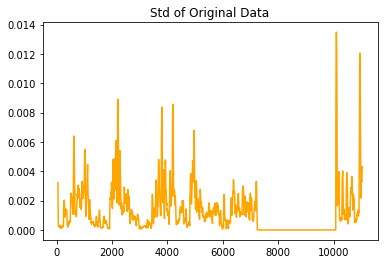

(959,)


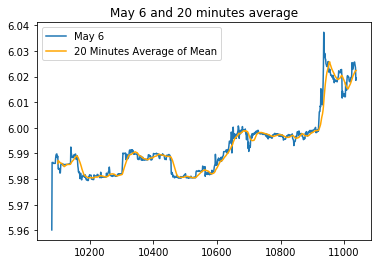

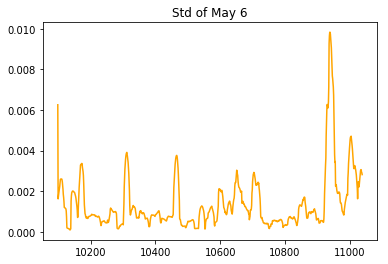

(959,)


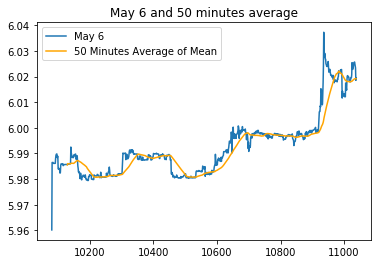

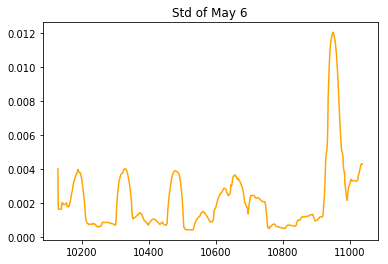

In [73]:
plot_data(df_orig,20,'Original Data')
plot_data(df_orig,50,'Original Data')
plot_data(df_may6,20,'May 6')
plot_data(df_may6,50,'May 6')

In [172]:
def dataLoader_OLS(data):
    train_features=data.iloc[:-2,2:]
    train_labels=data.iloc[2:,5]
    test_features=data.iloc[-2:,2:]
    return train_features,train_labels,test_features

In [192]:
X,y,X_test=dataLoader_OLS(data_May_6[data_May_6.Volume>0])
# X,y,X_test=dataLoader_OLS(data_May_6)

In [177]:
np.isfinite(X.any())
np.isnan(X.any())

Open      True
High      True
Low       True
Close     True
Volume    True
dtype: bool

In [188]:
X.fillna(0)
X.tail()

,Open,High,Low,Close,Volume
11032,6.02511,6.02547,6.02509,6.02545,2.955000e+10
11033,6.02548,6.02566,6.02537,6.02566,NaN
11034,6.02559,6.02559,6.02483,6.02483,4.361000e+04
11035,6.02480,6.02492,6.02397,6.02397,2.737000e+11
11036,6.02397,6.02397,6.02300,6.02336,2.585000e+16


In [193]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
# regr.fit(X.iloc[-10:,:], y.iloc[-10:])
regr.fit(X.fillna(0),y)
# Make predictions using the testing set
y_pred = regr.predict(X.fillna(0))
MSE=sklearn.metrics.mean_squared_error(y, y_pred)
print("MSE for OLS is ",str(MSE))

y_pred=regr.predict(X_test)
print("Estimations for 15.59 and 16.00 are",y_pred)

MSE for OLS is  0.00013340104564319555
Estimations for 15.59 and 16.00 are [5.9925989  5.99336109]


In [194]:
reg = linear_model.Ridge(alpha=.5)
reg.fit(X.fillna(0), y)

# Make predictions using the testing set
y_pred = reg.predict(X.fillna(0))
MSE=sklearn.metrics.mean_squared_error(y, y_pred)
print("MSE for Ridge is ",str(MSE))

y_pred=reg.predict(X_test)
print("Estimations for 15.59 and 16.00 are",y_pred)

MSE for Ridge is  3.6008688237281074e-05
Estimations for 15.59 and 16.00 are [6.00654176 6.00601358]


In [195]:
alldata=pd.read_csv("usdtrytrading.txt",sep="\t")
data=alldata.iloc[::60,:]
print(data)
# data=data[data.Volume>0]
# print(data.iloc[:100,:])

              Day  Time     Open     High      Low    Close        Volume
0      29.04.2019     0  5.93387  5.93387  5.93387  5.93387  0.000000e+00
60     29.04.2019   100  5.94333  5.94390  5.94287  5.94287  2.015000e+11
120    29.04.2019   200  5.94263  5.94286  5.94229  5.94286  1.421000e+12
180    29.04.2019   300  5.94312  5.94313  5.94312  5.94312  2.980000e+10
240    29.04.2019   400  5.94440  5.94458  5.94440  5.94449  2.960000e+10
300    29.04.2019   500  5.95062  5.95079  5.95062  5.95079  9.000000e+06
360    29.04.2019   600  5.94975  5.94983  5.94946  5.94983  9.350000e+10
420    29.04.2019   700  5.94882  5.94906  5.94882  5.94906  3.700000e+10
480    29.04.2019   800  5.94956  5.94969  5.94956  5.94969  7.400000e+09
540    29.04.2019   900  5.95021  5.95232  5.95017  5.95232  1.296800e+12
600    29.04.2019  1000  5.95086  5.95206  5.95055  5.95122  4.694000e+11
660    29.04.2019  1100  5.94708  5.94744  5.94648  5.94670  5.774000e+11
720    29.04.2019  1200  5.93996  5.94

In [196]:
X,y,X_test2=dataLoader_OLS(data)
print(X.shape)
print(X)

(182, 5)
          Open     High      Low    Close        Volume
0      5.93387  5.93387  5.93387  5.93387  0.000000e+00
60     5.94333  5.94390  5.94287  5.94287  2.015000e+11
120    5.94263  5.94286  5.94229  5.94286  1.421000e+12
180    5.94312  5.94313  5.94312  5.94312  2.980000e+10
240    5.94440  5.94458  5.94440  5.94449  2.960000e+10
300    5.95062  5.95079  5.95062  5.95079  9.000000e+06
360    5.94975  5.94983  5.94946  5.94983  9.350000e+10
420    5.94882  5.94906  5.94882  5.94906  3.700000e+10
480    5.94956  5.94969  5.94956  5.94969  7.400000e+09
540    5.95021  5.95232  5.95017  5.95232  1.296800e+12
600    5.95086  5.95206  5.95055  5.95122  4.694000e+11
660    5.94708  5.94744  5.94648  5.94670  5.774000e+11
720    5.93996  5.94130  5.93913  5.94127  4.527000e+11
780    5.93109  5.93411  5.93097  5.93393  4.368000e+11
840    5.93094  5.93095  5.93043  5.93050  1.646000e+11
900    5.93188  5.93458  5.93181  5.93391  7.893000e+11
960    5.93573  5.93667  5.93537  5.935

In [203]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, y)

# Make predictions using the testing set
y_pred = regr.predict(X)
MSE=sklearn.metrics.mean_squared_error(y, y_pred)
print("MSE for OLS is ",str(MSE))

y_pred=regr.predict(X_test)
print("Estimations for 15.59 and 16.00 are",y_pred)

MSE for OLS is  0.00013376886761253367
Estimations for 15.59 and 16.00 are [5.98533831 5.99766034]


In [204]:
reg = linear_model.Ridge(alpha=.5)
reg.fit(X.fillna(0), y)

# Make predictions using the testing set
y_pred = reg.predict(X.fillna(0))
MSE=sklearn.metrics.mean_squared_error(y, y_pred)
print("MSE for Ridge is ",str(MSE))

y_pred=reg.predict(X_test)
print("Estimations for 15.59 and 16.00 are",y_pred)

MSE for Ridge is  0.00010806865520705216
Estimations for 15.59 and 16.00 are [5.99022165 6.00074111]


(184,)


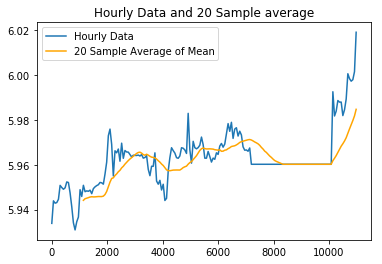

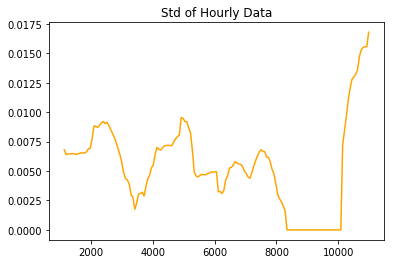

(184,)


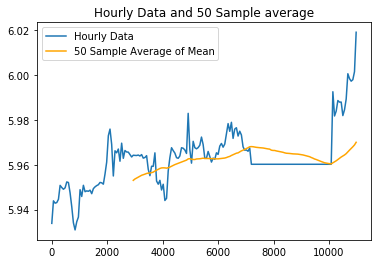

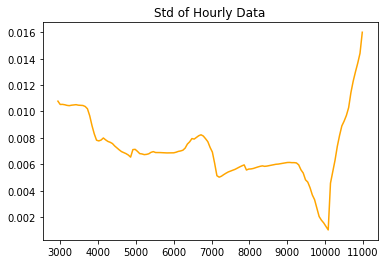

In [202]:
plot_data(data.iloc[:,3],20,'Hourly Data')
plot_data(data.iloc[:,3],50,'Hourly Data')
